📂 Loading data from: C:\Users\Prashant Jha\OneDrive\Documents\vs code\Credi_Risk\data\south_german_credit.csv
✅ Saved: C:\Users\Prashant Jha\OneDrive\Documents\vs code\Credi_Risk\evaluation\class_dist_before_smote_german.png


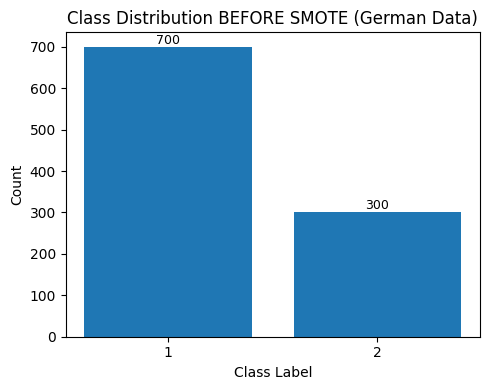

📂 Loading resampled labels from: C:\Users\Prashant Jha\OneDrive\Documents\vs code\Credi_Risk\data\y_resampled_german.npy
✅ Saved: C:\Users\Prashant Jha\OneDrive\Documents\vs code\Credi_Risk\evaluation\class_dist_after_smote_german.png


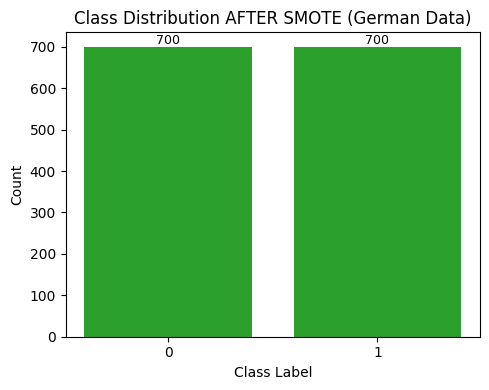

🎉 All plots generated successfully!


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from collections import Counter

# --------------------------------------------------------
# Paths
# --------------------------------------------------------

BASE_DIR = Path().resolve().parent

data_dir = BASE_DIR / "data"
eval_dir = BASE_DIR / "evaluation"

csv_path = data_dir / "south_german_credit.csv"
y_path = data_dir / "y_resampled_german.npy"

# Create evaluation directory if it doesn't exist
eval_dir.mkdir(exist_ok=True)

# --------------------------------------------------------
# Plot BEFORE SMOTE
# --------------------------------------------------------

print("📂 Loading data from:", csv_path)
df = pd.read_csv(csv_path)

counts_before = df["Credit_Risk"].value_counts().sort_index()
labels_before = counts_before.index.astype(str)
values_before = counts_before.values

plt.figure(figsize=(5, 4))
bars = plt.bar(labels_before, values_before, color="#1f77b4")
plt.title("Class Distribution BEFORE SMOTE (German Data)")
plt.xlabel("Class Label")
plt.ylabel("Count")

# Add labels on bars
for bar, value in zip(bars, values_before):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value * 1.0,
        f"{value:,}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
before_path = eval_dir / "class_dist_before_smote_german.png"
plt.savefig(before_path, dpi=300)
print(f"✅ Saved: {before_path}")
plt.show()

# --------------------------------------------------------
# Plot AFTER SMOTE
# --------------------------------------------------------

print("📂 Loading resampled labels from:", y_path)
y_resampled = np.load(y_path)

counts_after = Counter(y_resampled)
labels_after = [str(k) for k in sorted(counts_after.keys())]
values_after = [counts_after[k] for k in sorted(counts_after.keys())]

plt.figure(figsize=(5, 4))
bars = plt.bar(labels_after, values_after, color="#2ca02c")
plt.title("Class Distribution AFTER SMOTE (German Data)")
plt.xlabel("Class Label")
plt.ylabel("Count")

# Add labels on bars
for bar, value in zip(bars, values_after):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value * 1,
        f"{value:,}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
after_path = eval_dir / "class_dist_after_smote_german.png"
plt.savefig(after_path, dpi=300)
print(f"✅ Saved: {after_path}")
plt.show()

print("🎉 All plots generated successfully!")
